# Redução de Dimensionalidade e Clusterização
Nosso maoir objetivo é explorar algumas tecnicas de redução de diumencionalidade e clusterização com o objetivo de apresenatrar uma projeção 2D do nosso dataset.

In [2]:
# Bibliotecas usadas
import os 
import sys

sys.path.append(os.path.abspath('..'))

from scripts.ulteis import preprocess

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import umap.umap_ as umap

# Sobre os dados 
Faremos a leitura dos dados e aplicaremos alguns preprocessemntos já definidos para vetorizar com o CountVectorize.

In [8]:
bbc_df = pd.read_csv("../data/bbc_data.csv")

text_df = bbc_df["data"].apply(preprocess)
labels_df = bbc_df["labels"]

# Vetorização
cv = CountVectorizer(stop_words=stopwords.words("english"))
X = cv.fit_transform(text_df)

# Dimenção 
print(X.shape)
print(labels_df.value_counts())

(2225, 25363)
labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


In [12]:
X.toarray().shape

(2225, 25363)

# Redução de Dimensionalidade com PCA

Aplicação do PCA (Principal Component Analysis) para reduzir a dimensionalidade dos dados, preservando 95% da variância.

In [6]:
# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X.toarray())
X_pca.shape 

(2225, 1254)

## Mais de 95% de redução de dimencionalidade !
Após a aplicação do **PCA (Principal Component Analysis)**, conseguimos uma redução significativa na dimensionalidade dos dados:

- **Dimensionalidade Original**: 25.363 características
- **Dimensionalidade Reduzida**: 1.254 características

Isso significa que o **PCA** foi capaz de reduzir mais de **95% da dimensionalidade**, mantendo a mesma quantidade de variância explicada nos dados originais. Essa redução tem um impacto positivo direto na **eficiência computacional** e na **simplicidade do modelo**, sem comprometer a integridade dos dados.

### Visualização da Redução

Para visualizar essa transformação, veja abaixo a comparação entre a dimensionalidade original e a reduzida:

| **Dimensão Original** | **Dimensão Reduzida** | **Porcentagem de Redução** |
|-----------------------|-----------------------|----------------------------|
| 25.363                | 1.254                 | 95.05%                     |


# K-means
Usaremos agora o k means para construir clustering dos dados resultante do PCA e aplicareamos o metodo do cotovelo para determinar o melhor K.

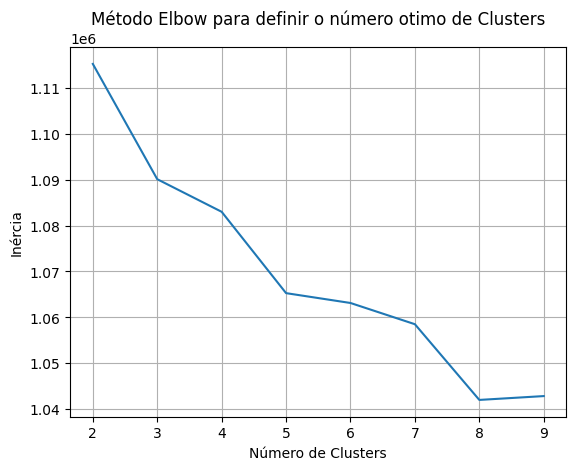

In [15]:
inertia = []
# K-means com 2 a 10 clusters
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia)
plt.title("Método Elbow para definir o número otimo de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()
    

## Resultados Método Elbow
Com base no valores de inercia, quando menor ela for mais semelhantes os elementos dos clusters tende a ser, notemos que aparti de k = 5 a diminuição de inercia começa a decrecer de forma mais lenta, sendo assim, pelo metodo do cotovelo k = 5 um ótimo número de clusters para nosso problema.

# Projeção com T-SNE e UMAP
Nosso objetivo é ter uma visualização do comportamente dos clusters encontados anteriormente em 2D, em particular usando os algoritimos **T-SNE** e **UMAP**

t-SNE Perplexity = 5, Silhouette Score = -0.15235641598701477


/home/shinigami/.cache/pypoetry/virtualenvs/pln-LPbjoYHC-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP n_neighbors = 5, Silhouette Score = -0.14408321678638458
t-SNE Perplexity = 10, Silhouette Score = -0.305329293012619


/home/shinigami/.cache/pypoetry/virtualenvs/pln-LPbjoYHC-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP n_neighbors = 10, Silhouette Score = -0.1474503129720688
t-SNE Perplexity = 20, Silhouette Score = -0.3315896987915039


/home/shinigami/.cache/pypoetry/virtualenvs/pln-LPbjoYHC-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP n_neighbors = 15, Silhouette Score = -0.1461361050605774
t-SNE Perplexity = 30, Silhouette Score = -0.37989211082458496


/home/shinigami/.cache/pypoetry/virtualenvs/pln-LPbjoYHC-py3.12/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP n_neighbors = 30, Silhouette Score = -0.18354982137680054
Melhor Perplexity para t-SNE: 5 com Silhouette Score: -0.15235641598701477
Melhor n_neighbors para UMAP: 5 com Silhouette Score: -0.14408321678638458


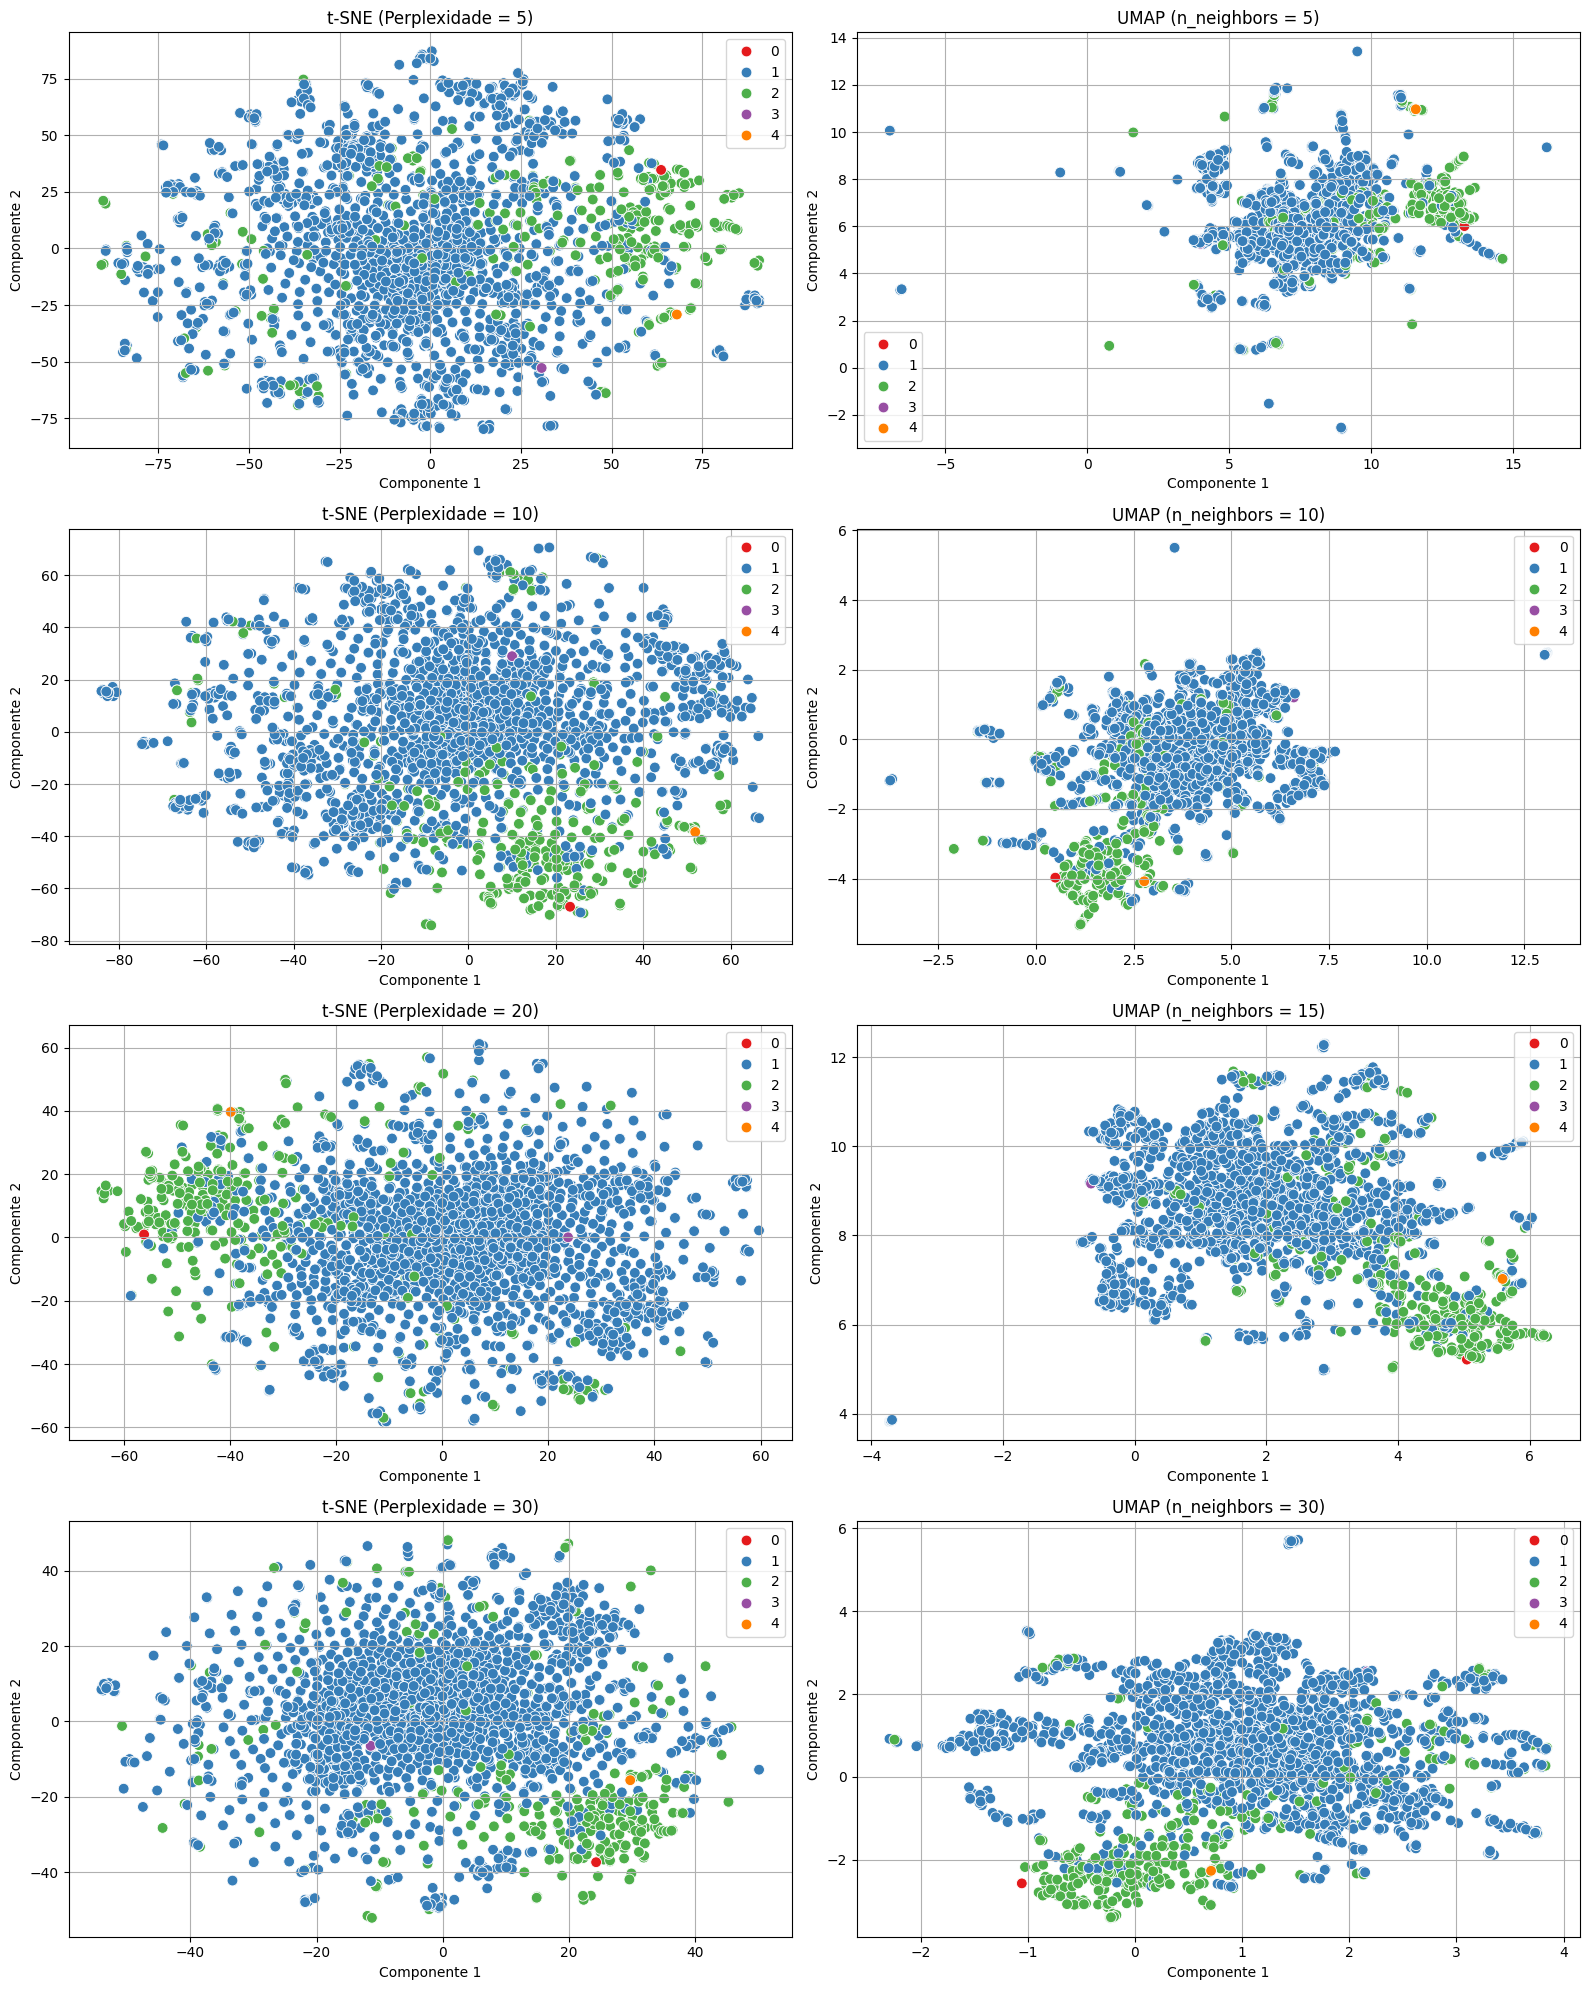

In [12]:
# Função para testar diferentes valores de perplexidade no t-SNE e n_neighbors no UMAP e plotar os resultados lado a lado
def test_tsne_umap_params(X, kmeans_labels, perplexity_values, n_neighbors_values):
    
    # Melhores parametros
    best_tsne_score = -1
    best_umap_score = -1
    best_tsne_perplexity = None
    best_umap_n_neighbors = None


    num_plots = min(len(perplexity_values), len(n_neighbors_values))
    fig, axes = plt.subplots(num_plots, 2, figsize=(16, 5 * num_plots))

    for i in range(num_plots):
        perplexity = perplexity_values[i]
        n_neighbors = n_neighbors_values[i]

        # Aplicando t-SNE com perplexidade variada
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X)

        # Avaliar t-SNE para diferentes perplexidades
        score = silhouette_score(X_tsne, kmeans_labels)
        print(f"t-SNE Perplexity = {perplexity}, Silhouette Score = {score}")
        
        if score > best_tsne_score:
            best_tsne_score = score
            best_tsne_perplexity = perplexity
        # Plotando t-SNE
        ax_tsne = axes[i, 0]
        sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette="Set1", s=60, ax=ax_tsne)
        ax_tsne.set_title(f't-SNE (Perplexidade = {perplexity})')
        ax_tsne.set_xlabel('Componente 1')
        ax_tsne.set_ylabel('Componente 2')
        ax_tsne.grid(True)

        # Aplicando UMAP com n_neighbors variado
        umap_model = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
        X_umap = umap_model.fit_transform(X)

        # Avaliar UMAP para diferentes n_neighbors
        score = silhouette_score(X_umap, kmeans_labels)
        print(f"UMAP n_neighbors = {n_neighbors}, Silhouette Score = {score}")
        
        if score > best_umap_score:
            best_umap_score = score
            best_umap_n_neighbors = n_neighbors
            
            
        # Plotando UMAP
        ax_umap = axes[i, 1]
        sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=kmeans_labels, palette="Set1", s=60, ax=ax_umap)
        ax_umap.set_title(f'UMAP (n_neighbors = {n_neighbors})')
        ax_umap.set_xlabel('Componente 1')
        ax_umap.set_ylabel('Componente 2')
        ax_umap.grid(True)

    print(f"Melhor Perplexity para t-SNE: {best_tsne_perplexity} com Silhouette Score: {best_tsne_score}")
    print(f"Melhor n_neighbors para UMAP: {best_umap_n_neighbors} com Silhouette Score: {best_umap_score}")
    
    plt.tight_layout()
    plt.show()

# Definir os valores de perplexidade para t-SNE e n_neighbors para UMAP
perplexity_values = [5, 10, 20, 30]
n_neighbors_values = [5, 10, 15, 30]

kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_pca)
test_tsne_umap_params(X.toarray(), kmeans_labels, perplexity_values, n_neighbors_values)